# How to compute climate metrics from annual emissions

In [1]:
import sys

from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import quad, trapz
import seaborn as sns

sys.path.append('..')  # provide access to the root folder
from climate_metrics import impulse_response_function, _get_radiative_efficiency_kg
from climate_metrics import AGWP_CO2, AGWP_CH4_no_CO2

In [2]:
time_horizon = 100
time_axis = np.arange(0, time_horizon+1)

## Visualizing atmospheric lifetimes

Each greenhouse has an atmospheric lifetime.  Atmospheric lifetimes are affected by physical and chemical processes that transfer gases out of the atmosphere.

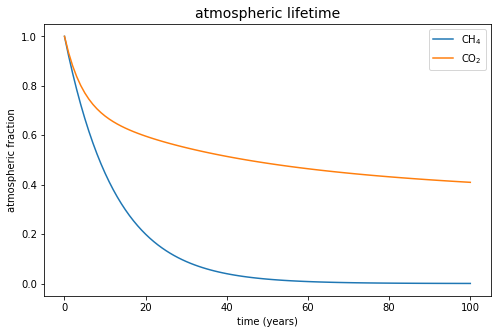

In [3]:
plt.figure(figsize=(8,5))
plt.plot(
    time_axis,
    impulse_response_function(time_axis, "CH4"),
    label='CH$_4$'
)
plt.plot(
    time_axis,
    impulse_response_function(time_axis, "CO2"),
    label='CO$_2$'
)
plt.ylabel('atmospheric fraction')
plt.xlabel('time (years)')
plt.title('atmospheric lifetime', size=14)
_ = plt.legend()

# Absolute global warming potential

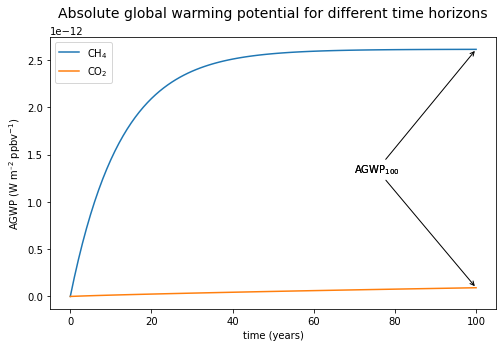

In [4]:
AGWP_CH4_result = AGWP_CH4_no_CO2(time_axis)
AGWP_CO2_result = AGWP_CO2(time_axis)

# text annotation
AGWP_text = 'AGWP$_{100}$'
xy_CO2 = (time_axis[100], AGWP_CO2_result[100])
xy_CH4 = (time_axis[100], AGWP_CH4_result[100])
xy_text = (time_axis[100]*0.7, AGWP_CH4_result[100]*0.5)

plt.figure(figsize=(8,5))
plt.plot(
    time_axis,
    AGWP_CH4_result,
    label='CH$_4$'
)
plt.plot(
    time_axis,
    AGWP_CO2_result,
    label='CO$_2$'
)
plt.ylabel('AGWP (W m$^{–2}$ ppbv$^{-1}$)')
plt.xlabel('time (years)')
plt.title(
    'Absolute global warming potential for different time horizons',
    size=14,
    y=1.05)
plt.legend()
plt.annotate(
    AGWP_text,
    xy=xy_CO2,
    xytext=xy_text ,
    arrowprops=dict(arrowstyle='->',lw=1)
    )
_ = plt.annotate(
    AGWP_text,
    xy=xy_CH4,
    xytext=xy_text ,
    arrowprops=dict(arrowstyle='->',lw=1)
    )

# Global Warming Potential

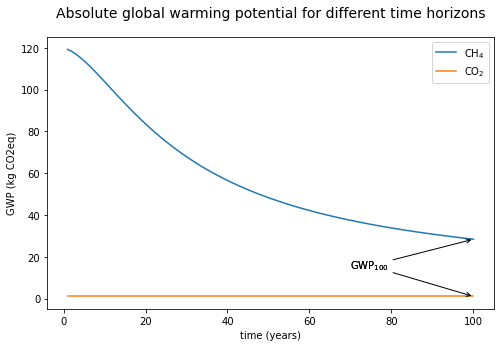

In [5]:
# ignore the divide by zero error at time = 0
np.seterr(divide='ignore', invalid='ignore')

GWP_CH4 = AGWP_CH4_result/AGWP_CO2_result
GWP_CO2 = AGWP_CO2_result/AGWP_CO2_result

# text annotation
GWP_text = 'GWP$_{100}$'
xy_CO2 = (time_axis[100], GWP_CO2[100])
xy_CH4 = (time_axis[100], GWP_CH4[100])
xy_text = (time_axis[100]*0.7, GWP_CH4[100]*0.5)

plt.figure(figsize=(8,5))
plt.plot(
    time_axis,
    AGWP_CH4_result/AGWP_CO2_result,
    label='CH$_4$'
)
plt.plot(
    time_axis,
    AGWP_CO2_result/AGWP_CO2_result,
    label='CO$_2$'
)
plt.ylabel('GWP (kg CO2eq)')
plt.xlabel('time (years)')
plt.title(
    'Absolute global warming potential for different time horizons',
    size=14,
    y=1.05)
plt.legend()
plt.annotate(
    GWP_text,
    xy=xy_CO2,
    xytext=xy_text,
    arrowprops=dict(arrowstyle='->',lw=1)
    )
_ = plt.annotate(
    GWP_text,
    xy=xy_CH4,
    xytext=xy_text,
    arrowprops=dict(arrowstyle='->',lw=1)
    )